## Comarison of Algorithms
#### Importing libraries

In [24]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn import preprocessing, metrics
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Load Datasets

In [25]:
url = "Test-Data-10.csv"
df = pd.read_csv(url)
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
df.head(20)

,Year,Not Suicide(0)/Suicide(1),Age,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Reason,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
0,2018,0,30,F,Islam,Muslim,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,...,0,0,None,Asthma,None,0,0,0,0,0
1,2018,0,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,...,0,0,None,Other,None,0,1,0,0,0
2,2018,0,85,M,Islam,Muslim,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,...,0,0,None,Diabetes,None,0,1,0,0,0
3,2017,1,87,M,Christian,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,0,None,Chronic pain,Frequent,1,1,1,1,1
4,2018,0,59,M,Islam,Muslim,Pensioners,Unmarried,Other,Alzheimer's disease,...,0,0,None,COPD,None,0,1,0,1,1
5,2017,1,31,M,Other,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Unmarried,Passed G.C.E (O/L),Harrasment by the husband & family disputes,...,1,1,None,Other,Frequent,1,1,1,1,1
6,2018,0,75,M,Christian,Burger,Armed Services,Married,Passed G.C.E (A/L),Natural Death,...,0,0,None,Unknown,None,0,0,0,0,0
7,2018,1,47,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,1,None,Other,Moderate,0,0,1,1,0
8,2018,0,58,M,Christian,Burger,Armed Services,Unmarried,University Degree or above,Diabetes,...,0,0,None,Unknown,None,0,0,0,0,0
9,2018,0,36,M,Hindu,Tamil,Armed Services,Married,University Degree or above,Natural Death,...,0,0,None,Unknown,None,0,1,0,0,0


#### Replacing unwanted labels with a unique label

In [26]:
df['Reason'].replace(['Asthma', "Alzheimer's disease", 'Diabetes',
              'Cirrhosis', 'Ischemic heart disease', 
              'Road Accident','Chronic kidney disease'],
             ['Natural Death','Natural Death','Natural Death','Natural Death',
              'Natural Death','Natural Death','Natural Death'], inplace = True)
df['Reason'].replace(['Stroke/Chronic diseases & Physical disabilities'],
             ['Chronic diseases & Physical disabilities'], inplace = True)
df1 = df[include]

#### Label Encoder

In [27]:
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df1[col] = labelEncoder.fit_transform(df1[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df1.head(20))

for x, y in mapping_dict.items():
  print(x, y)

    Age  Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0    30       0        3     1                     0             2   
1    91       0        3     1                     8             1   
2    85       1        3     1                     9             1   
3    87       1        1     3                    12             1   
4    59       1        3     1                     4             2   
5    31       1        4     3                     1             2   
6    75       1        1     0                     2             1   
7    47       1        0     3                    12             1   
8    58       1        1     0                     2             2   
9    36       1        2     4                     2             1   
10   87       1        0     3                    12             1   
11   73       1        1     0                     3             1   
12   44       1        0     3                     1             1   
13   62       1     

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
feature_cols = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated']
X = df1[feature_cols] # Features
y = df1['Not Suicide(0)/Suicide(1)']

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#### Import Random Forest Model

In [29]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)
y_pred2 = rfc.predict(X_train)

#### Import Decision Tree Model

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Import SVM-Linear model

In [31]:
#Importing the svm model
from sklearn import svm

#Build a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#### Import SVM-Polynomial kernal Model


In [32]:
#Importing the svm model
from sklearn import svm

#Build a svm Classifier
clf = svm.SVC(kernel='poly') # polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Import SVM-RBF kernal Model

In [33]:
#Importing the svm model
from sklearn import svm

#Build a svm Classifier
clf = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#### Import K-Neighbors Classifier Model

In [34]:
clf = KNeighborsClassifier(n_neighbors = 8)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)

#### Import GaussianNB Classifier Model

In [35]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)

#### Import LinearSVC Classifier Model

In [36]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Import Perceptron Model

In [37]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)


93.86


#### Import LogisticRegression  Classifier Model

In [38]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)



c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: Con

LR: 0.957143 (0.014983)
RFC: 0.965714 (0.017728)
KNN: 0.821429 (0.041404)
DTC: 0.925714 (0.016660)
NB: 0.941429 (0.013851)
SVM-L: 0.957143 (0.019166)
SVM-Poly: 0.765714 (0.022768)
SVM-RBF: 0.795714 (0.023299)
Perceptron: 0.702857 (0.147191)
L-SVC: 0.950000 (0.010102)


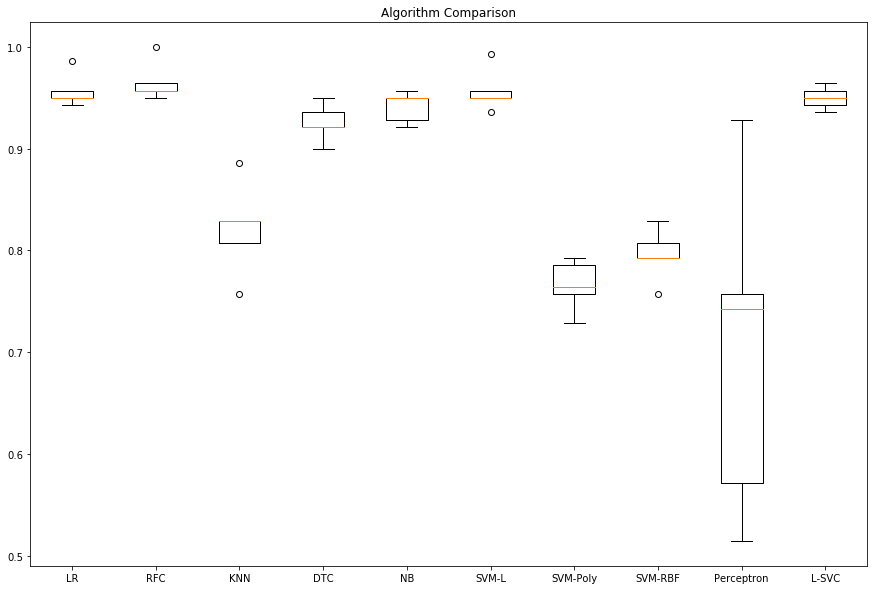

In [41]:
#Logistic Regression (LR)
#Random Forest Classifier (RFC)
#K-Nearest Neighbors (KNN).
#DecisionTreeClassifier (DTC).
#Gaussian Naive Bayes (NB).
#Support Vector Machines Linear kernel (SVM-L).
#Support Vector Machines Polynomial kernel (SVM-Poly).
#Support Vector Machines RBF kernel (SVM-RBF).

models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier(n_estimators=10)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM-L', svm.SVC(kernel='linear')))
models.append(('SVM-Poly', svm.SVC(kernel='poly')))
models.append(('SVM-RBF', svm.SVC(kernel='rbf')))
models.append(('Perceptron', Perceptron(max_iter=5, tol=None)))
models.append(('L-SVC', LinearSVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=0)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()
